### <center> <font color="blue"> Exploratory Data Analysis</font> 

    
### Data used: **nba.txt**, **tips.xlsx**, and **invoices.clsx**
Series documentation:  https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html

Data Frame documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

## Preparations

#### For the preparations I first imported the necessary libraries and loaded the files needed for our EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Display related options
%matplotlib inline
# palette options: "colorblind", 'Set1', "Set2", "Set3", "summer", "spring", "pastel", "rainbow"
#sns.set(palette = "rainbow")
sns.set(palette = "rainbow")

In [2]:
#nba = pd.read_csv("nba.txt")
nba = pd.read_csv("nba.txt")
nba.tail()

,Name,Team,Number,Position,Age,height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,75.0,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,73.0,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,87.0,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,84.0,231.0,Kansas,947276.0
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# <center><font color=blue> Data Exploration </font></center>

### Plot showing the number of nba players for each playing position using Seaborn

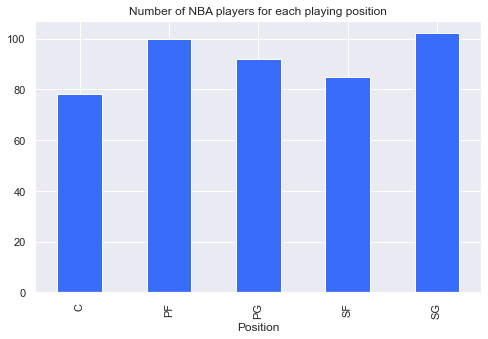

In [3]:
nba.groupby('Position').Position.count().plot(kind="bar", figsize= (8,5),title = "Number of NBA players for each playing position");



### Are there any players whose name is the same as another player in the nba df?

In [4]:
# Answer 

print("Is it true that there are players whose name is the same as another player in the nba df?")

nba['Name'].duplicated().any()

Is it true that there are players whose name is the same as another player in the nba df?


False

## What are the names of the colleges that the players come from?

In [5]:
nba.College.unique()


array(['Texas', 'Marquette', 'Boston University', 'Georgia State', nan,
       'LSU', 'Gonzaga', 'Louisville', 'Oklahoma State', 'Ohio State',
       'Washington', 'Kentucky', 'North Carolina', 'Arizona',
       'Georgia Tech', 'Cincinnati', 'Miami (FL)', 'Stanford', 'Syracuse',
       'Saint Louis', 'Kansas', 'Georgetown', 'Texas A&M', 'UCLA', 'UNLV',
       'Wichita State', "Saint Joseph's", 'Notre Dame', 'Norfolk State',
       'Duke', 'Murray State', 'Tennessee State', 'Bowling Green',
       'Purdue', 'Wake Forest', 'Michigan', 'Missouri', 'USC',
       'Villanova', 'Rider', 'Utah', 'Belmont', 'Davidson', 'Vanderbilt',
       'Michigan State', 'Florida', 'Washington State', 'Arizona State',
       'Oklahoma', 'Wyoming', "St. John's", 'Maryland', 'Wisconsin',
       'Utah Valley', 'North Carolina State', 'UC Santa Barbara',
       'Baylor', 'Connecticut', 'Oregon State', 'New Mexico', 'Oregon',
       'Creighton', 'Arkansas', 'Memphis', "Saint Mary's", 'Tennessee',
       'Alabama'

In [7]:
tips = pd.read_excel("tips.xlsx")

tips.head()

,total_bill,tip,sex,smoker,day,time,table_size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


###  -  Male and Female customers in tips.xlsx

In [8]:
tips.value_counts('sex')

sex
Male      157
Female     87
dtype: int64

###  Percentages of male and Female customers

In [15]:
#Answer Ex 2a

tips.sex.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Male      64.3%
Female    35.7%
Name: sex, dtype: object

###  Male and Female visually

<AxesSubplot:ylabel='sex'>

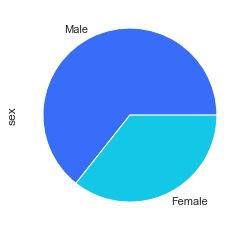

In [40]:
tips.sex.value_counts(normalize=True).plot(kind="pie")

#tips.groupby('sex').sex.count().plot(kind="bar", figsize= (8,5),title = "Male vs Female Customers");

### Bill amount among male customers vs. female customers comparison

In [9]:
tips.groupby('sex').total_bill.mean()



sex
Female    18.056897
Male      20.744076
Name: total_bill, dtype: float64

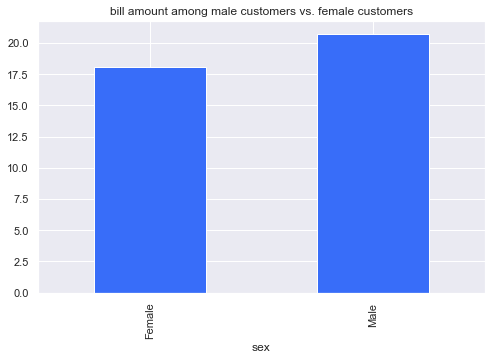

In [10]:
# Visually
tips.groupby('sex').total_bill.mean().plot(kind="bar", figsize= (8,5),title = "bill amount among male customers vs. female customers");

### Relation between total_bill and the tip.

In [11]:
# Correlation between total bill and tip amount is moderate and positive
tips.total_bill.corr(tips.tip)

0.6757341092113641

### Read the file "invoices.xlsx"   and create a dataframe

In [20]:

invoices = pd.read_excel("invoices.xlsx")

invoices.head()


,date,products,region,salesrep,customer,num_units,sales_amt
0,2019-01-01,Quad,East,Sioux,Acme,16,432
1,2019-01-02,Bellen,South,Gault,Acme,24,528
2,2019-01-02,Quad,West,Pham,Shoprite,30,810
3,2019-01-02,Bellen,West,Pham,Acme,19,418
4,2019-01-03,Sunshine,East,Pham,Acme,38,722


### Products column exploration

In [41]:
#invoices.describe

invoices.products.describe()

#unique values
#invoices.products.unique()
#invoices.products.nunique()

#invoices.products.value_counts().plot(kind="pie")

count           29
unique           5
top       Sunshine
freq             7
Name: products, dtype: object

### Summary showing the number of sales transactions by region

In [26]:
invoices.value_counts('region')

region
West       12
South       8
East        5
MidWest     4
dtype: int64

### Summary to show the total sales amount for each product

In [27]:
invoices.groupby('products').sales_amt.sum()


products
Bellen      3250
Carlota     3772
Quad        3780
Sunset      3717
Sunshine    3477
Name: sales_amt, dtype: int64

### Summary to show the number of transactions by each salesrep in each region</font>

In [28]:
pd.crosstab(invoices.salesrep, invoices.region, values=invoices.sales_amt, aggfunc="count", margins=True)


region,East,MidWest,South,West,All
salesrep,,,,,
Chin,2.0,1.0,NaN,1.0,4
Franks,1.0,1.0,NaN,5.0,7
Gault,NaN,NaN,1.0,NaN,1
Pham,1.0,NaN,4.0,3.0,8
Sioux,1.0,2.0,1.0,3.0,7
Smith,NaN,NaN,2.0,NaN,2
All,5.0,4.0,8.0,12.0,29


###  Summary of the number of transactions by each salesrep in each region  visually

<AxesSubplot:xlabel='salesrep'>

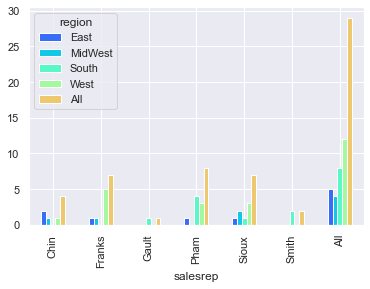

In [29]:
pd.crosstab(invoices.salesrep, invoices.region, values=invoices.sales_amt, aggfunc="count", margins=True).plot(kind="bar")
